## Contents
* 1 Import
* 2 Developing models and lists
* 3 Grid Search
* 4 Random Grid Search
* 5 Random Forest All Stations 1 decade
* 6 Oslo Grid Search
* 7 Oslo Random Forest

## 1 Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from numpy import argmax

In [2]:
#pleasant weather
pleasantdf=pd.read_csv(os.path.join(r"C:\Users\Samth\CareerFoundry Projects\Other\Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv"))

In [3]:
df=pd.read_csv(os.path.join(r"C:\Users\Samth\CareerFoundry Projects\DSML Achievement 2\1 DATA\MANIPULATED DATA\unscaled_cleandf_date.csv"))

In [4]:
df.head()

Unnamed: 0      DATE  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0           0  19600101                  7            0.85           1.018   
1           1  19600102                  6            0.84           1.018   
2           2  19600103                  8            0.90           1.018   
3           3  19600104                  3            0.92           1.018   
4           4  19600105                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_max  \
0              6.5             0.8  ...                 4.9   
1              6.1             3.3  ...                 5.0   
2              8.5             5.1  ...                 4.1   
3              6.3             3.8  ...                 2.3   
4              3.0            -0.7  ...                 4.3   

   VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                     5               0.88             1.0003   
1                     7               0.91             1.0007   
2                     7               0.91             1.0096   
3                     7               0.86             1.0184   
4                     3               0.80             1.0328   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   
1                       0.25                    0.84                0.7   
2                       0.17                    0.08                0.1   
3                       0.13                    0.98                0.0   
4                       0.46                    0.00                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 137 columns]

In [5]:
df.shape

(22950, 137)

In [6]:
pleasantdf

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0      19600101                       0                          0   
1      19600102                       0                          0   
2      19600103                       0                          0   
3      19600104                       0                          0   
4      19600105                       0                          0   
...         ...                     ...                        ...   
22945  20221027                       0                          0   
22946  20221028                       0                          0   
22947  20221029                       0                          0   
22948  20221030                       0                          0   
22949  20221031                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                              0                      0   
1                              0    

In [7]:
df=df.drop('Unnamed: 0',axis=1)

In [8]:
#make dataframe from df limiting data to one decade, 1990s
yeardf=df[df['DATE'].astype(str).str.contains('199')]
print(yeardf)

           DATE  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
10958  19900101                  0            0.83          1.0217   
10959  19900102                  2            0.84          1.0238   
10960  19900103                  8            0.89          1.0231   
10961  19900104                  2            0.77          1.0265   
10962  19900105                  7            0.81          1.0286   
...         ...                ...             ...             ...   
14605  19991227                  7            0.74          0.9953   
14606  19991228                  8            0.88          0.9956   
14607  19991229                  8            0.84          1.0162   
14608  19991230                  7            0.80          1.0276   
14609  19991231                  7            0.86          1.0252   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
10958                    0.60                 0.00             7.2   
10959              

In [9]:
#make pleasant dataframe from df limiting data to one decade, 1990s
pleasantyeardf=pleasantdf[pleasantdf['DATE'].astype(str).str.contains('199')]
print(pleasantyeardf)

           DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
10958  19900101                       0                          0   
10959  19900102                       0                          0   
10960  19900103                       0                          0   
10961  19900104                       0                          0   
10962  19900105                       0                          0   
...         ...                     ...                        ...   
14605  19991227                       0                          0   
14606  19991228                       0                          0   
14607  19991229                       0                          0   
14608  19991230                       0                          0   
14609  19991231                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
10958                          0                        0   
10959                          0     

In [10]:
#taking just data removing date
yeardfnew=yeardf.drop('DATE',axis=1)
yeardfnew

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
10958                  0            0.83          1.0217   
10959                  2            0.84          1.0238   
10960                  8            0.89          1.0231   
10961                  2            0.77          1.0265   
10962                  7            0.81          1.0286   
...                  ...             ...             ...   
14605                  7            0.74          0.9953   
14606                  8            0.88          0.9956   
14607                  8            0.84          1.0162   
14608                  7            0.80          1.0276   
14609                  7            0.86          1.0252   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
10958                    0.60                 0.00             7.2   
10959                    0.48                 0.00             2.3   
10960                    0.20                 0.00             0.0   
10961                    0.54                 0.00             5.6   
10962                    0.23                 0.04             0.2   
...                       ...                  ...             ...   
14605                    0.28                 1.93             1.0   
14606                    0.13                 1.22             0.0   
14607                    0.21                 0.11             0.1   
14608                    0.26                 0.01             0.5   
14609                    0.21                 0.09             0.0   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
10958             -2.1            -3.6             1.2                     2   
10959             -1.8            -3.9             1.7                     8   
10960             -2.2            -4.2             0.4                     5   
10961             -0.7            -3.1             2.2                     5   
10962              0.0            -3.1             2.6                     0   
...                ...             ...             ...                   ...   
14605              5.0             1.5             6.5                     5   
14606              2.4             1.0             3.4                     8   
14607              1.8             1.0             2.7                     6   
14608              1.1            -0.3             3.4                     3   
14609              0.7            -0.7             1.9                     7   

       ...  STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
10958  ...                -0.3                     3               0.82   
10959  ...                -3.4                     5               0.79   
10960  ...                -2.6                     4               0.90   
10961  ...                 0.5                     6               0.93   
10962  ...                 0.8                     4               0.91   
...    ...                 ...                   ...                ...   
14605  ...                 1.6                     7               0.75   
14606  ...                 1.0                     3               0.73   
14607  ...                -1.1                     5               0.81   
14608  ...                -2.5                     8               0.94   
14609  ...                -7.0                     6               0.94   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
10958             1.0068                       0.20                    0.51   
10959             1.0040                       0.21                    1.48   
10960             1.0094                       0.38                    0.00   
10961             1.0112                       0.13                    0.92   
10962             1.0108                       0.20                    0.56   
...                  ...                        ...                     ...   
14605             0.9954      

In [11]:
#removing date column from pleasant year
pleasantdfnew=pleasantyeardf.drop('DATE',axis=1)
pleasantdfnew

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
10958                       0                          0   
10959                       0                          0   
10960                       0                          0   
10961                       0                          0   
10962                       0                          0   
...                       ...                        ...   
14605                       0                          0   
14606                       0                          0   
14607                       0                          0   
14608                       0                          0   
14609                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
10958                          0                        0   
10959                          0                        0   
10960                          0                        0   
10961                          0                        0   
10962                          0                        0   
...                          ...                      ...   
14605                          0                        0   
14606                          0                        0   
14607                          0                        0   
14608                          0                        0   
14609                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
10958                            0                          0   
10959                            0                          0   
10960                            0                          0   
10961                            0                          0   
10962                            0                          0   
...                            ...                        ...   
14605                            0                          0   
14606                            0                          0   
14607                            0                          0   
14608                            0                          0   
14609                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
10958                        0                           0   
10959                        0                           0   
10960                        0                           0   
10961                        0                           0   
10962                        0                           0   
...                        ...                         ...   
14605                        0                           0   
14606                        0                           0   
14607                        0                           0   
14608                        0                           0   
14609                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
10958                            0                        0   
10959                            0                        0   
10960                            0                        0   
10961                            0                        0   
10962                            0                        0   
...                            ...                      ...   
14605                            0                        0   
14606                            0                        0   
14607                            0                        0   
14608                            0                        0   
14609                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
10958                          0                      0   
10959                          0                      0   
10960                          0                      0   
10961                          0  

In [12]:
#export one decade data
yeardfnew.to_csv(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\DSML Achievement 2\1 DATA\MANIPULATED DATA\cleandf_1990s.csv'))

In [13]:
#export pleasant one decade data
pleasantdfnew.to_csv(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\DSML Achievement 2\1 DATA\MANIPULATED DATA\pleasantdf_1990s.csv'))

## 2 Model and Lists

In [14]:
tf.random.set_seed(42)

In [15]:
#creating prediction
predictions = ['BASEL','BELGRADE','BUDAPEST','DEBILT','DUSSELDORF',
'HEATHROW','KASSEL','LJUBLJANA','MAASTRICHT', 'MADRID','MUNCHENB',
 'OSLO','SONNBLICK','STOCKHOLM','VALENTIA',]

In [16]:
# single column pleasant weather
y_single = pleasantdfnew.max(axis=1)
print(y_single.shape)

(3652,)


In [17]:
print(y_single.unique())

[0 1]


In [18]:
# reshape y
y_single = y_single.to_numpy().reshape(-1)
print(y_single.shape)

(3652,)


In [19]:
#create x
X = yeardfnew.to_numpy()

#changing data format
X=np.array(X)
y=np.array(y)

#reshaping X
X = X.reshape(-1,15,9)

In [20]:
print(X.shape)
print(y_single.shape)

(3652, 135)
(3652,)


In [21]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X,y_single,test_size=0.2)

In [22]:
y_train

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [23]:
X_train

array([[ 4.    ,  0.7   ,  1.0143, ..., 15.9   , 12.5   , 19.3   ],
       [ 2.    ,  0.64  ,  1.0152, ..., 15.2   , 13.4   , 17.    ],
       [ 8.    ,  0.86  ,  1.0169, ...,  9.8   ,  8.2   , 11.3   ],
       ...,
       [ 5.    ,  0.67  ,  1.0174, ...,  9.9   ,  6.6   , 13.1   ],
       [ 7.    ,  0.64  ,  1.0154, ..., 12.9   , 10.5   , 15.3   ],
       [ 5.    ,  0.86  ,  1.0026, ...,  8.4   ,  5.7   , 11.    ]])

In [24]:
print(X_train.shape)
print(y_train.shape)

(2921, 135)
(2921,)


## 3 Grid Search

In [25]:
%matplotlib inline

In [26]:
len(X_train[0])

135

In [27]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)

In [28]:
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,9],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [29]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


C:\Users\Samth\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Samth\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Samth\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Samth\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Samth\anaconda3\Lib\site-packa

Search took 3.1442404349644977 minutes


In [30]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 9, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Best GRID search score is: 0.9551536242405313


* initial grid accuracy is 0.9548 (will see if it goes any higher?)
* test seven grid accuracy is 0.9551 after changing max features up 2 steps

## 4 Random Search

In [31]:
clf2=RandomForestClassifier()

In [63]:
rs_space={'max_depth':list(np.arange(10, 100, step=9)) + [None],
              'n_estimators':np.arange(10, 500, step=75),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [64]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 5.2314135471979775 minutes


In [65]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 37, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 160}
Best RANDOM search score is: 0.9531009396061912


* initial grid accuracy is 0.9524 (will see if it goes any higher)
* test 7 with max_depth step 9, estimators step 75 accursacy is 0.9531

## 5 Random Forest

In [66]:
# creating a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 200, max_depth=None, max_features=9, min_samples_leaf=1, min_samples_split=3, criterion = 'entropy')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=9, min_samples_split=3,
                       n_estimators=200)

In [67]:
# performing predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.9644322845417237


In [68]:
#creating prediction
predictions = ['BASEL','BELGRADE','BUDAPEST','DEBILT','DUSSELDORF',
'HEATHROW','KASSEL','LJUBLJANA','MAASTRICHT', 'MADRID','MUNCHENB',
 'OSLO','SONNBLICK','STOCKHOLM','VALENTIA',]

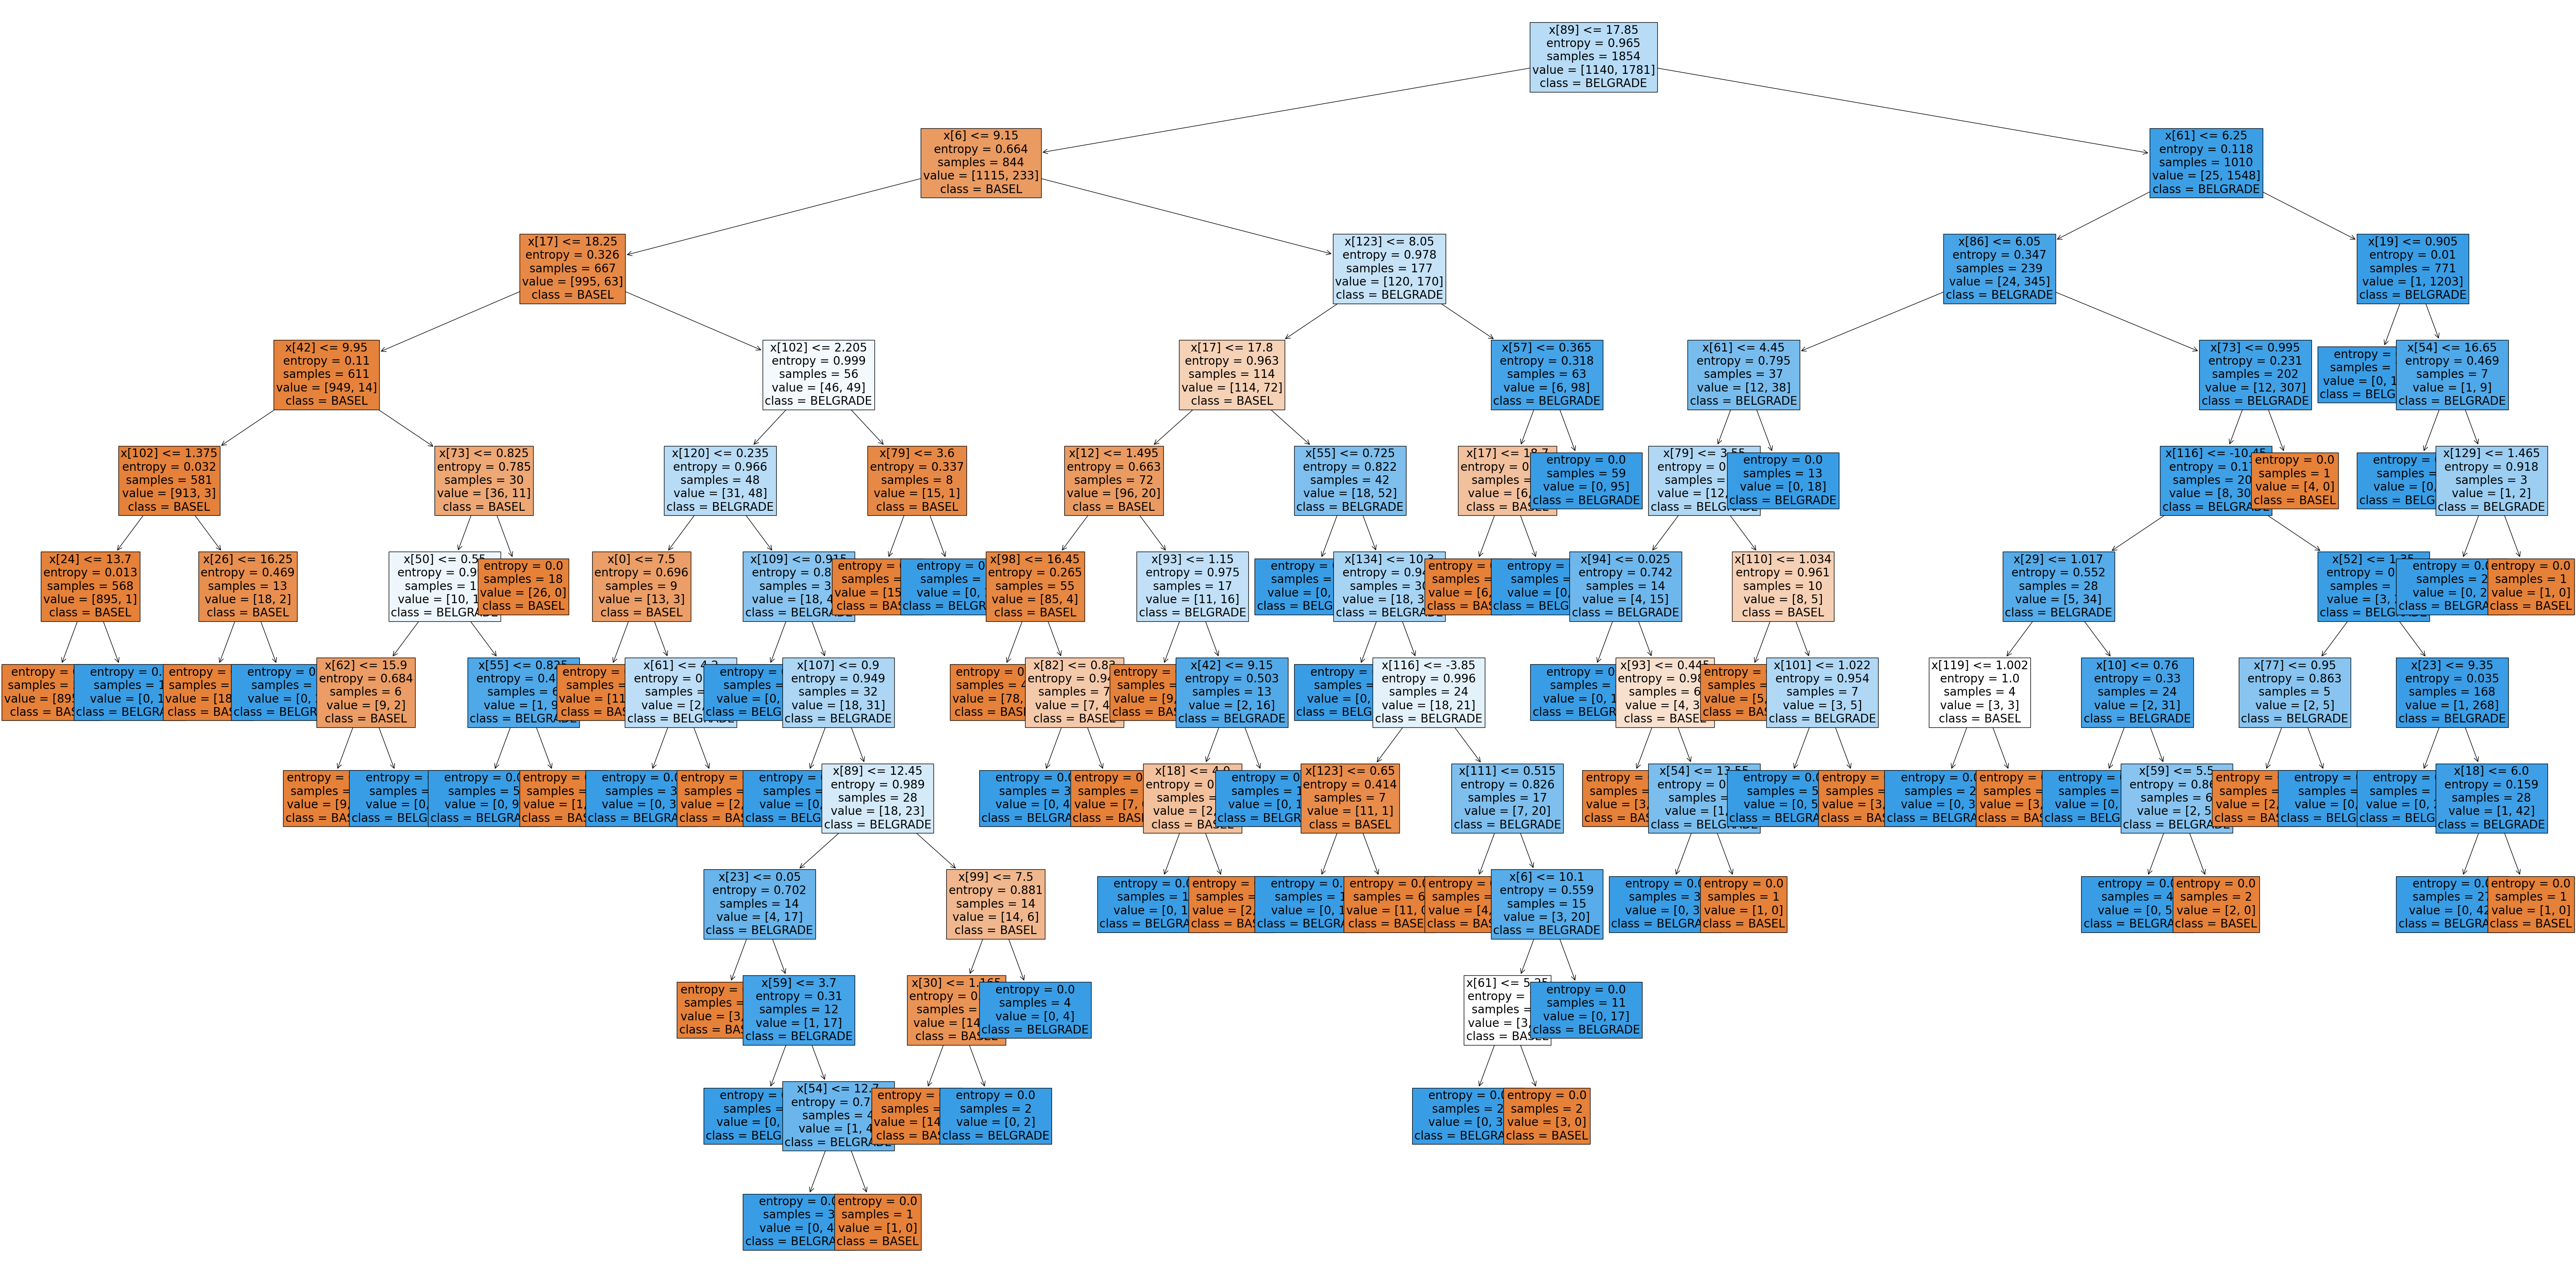

In [69]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, class_names=predictions, filled=True);

In [70]:
fig.savefig(r"C:\Users\Samth\CareerFoundry Projects\DSML Achievement 2\3 VISUALIZATIONS/optimized_decision_tree.png")

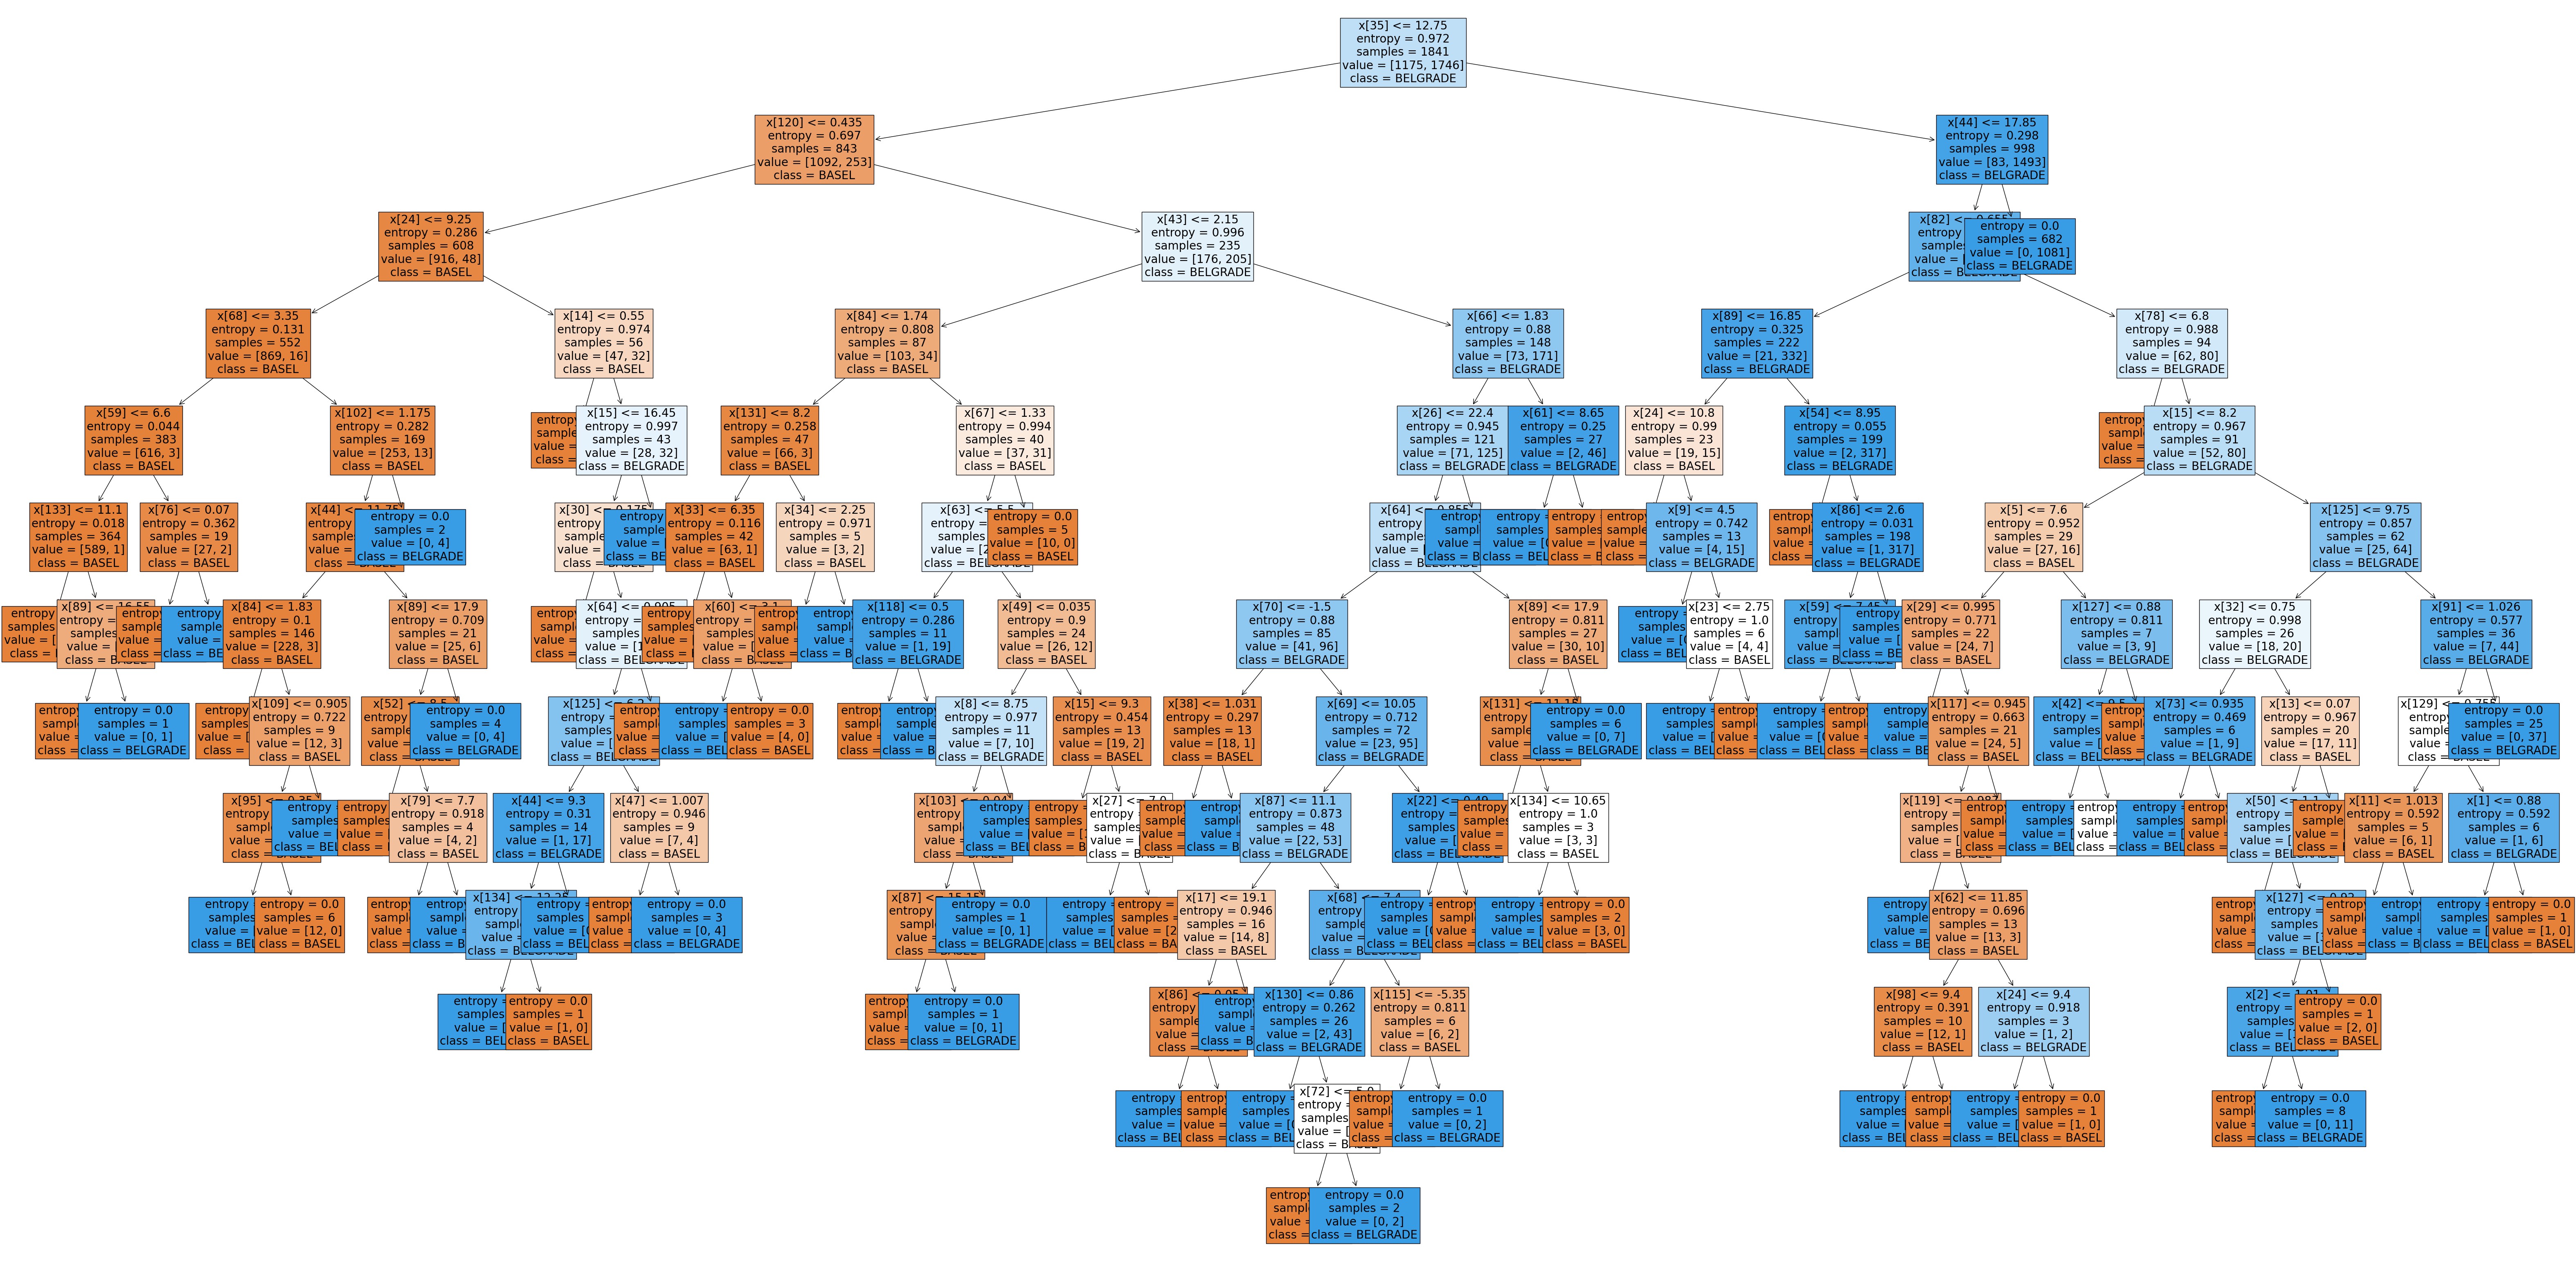

In [71]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[99], fontsize = 20, class_names=predictions, filled=True);

In [73]:
np.set_printoptions(threshold=np.inf)

newarray = clf3.feature_importances_

print(newarray)

[0.00066069 0.0017131  0.00178552 0.00235968 0.00142877 0.00148007
 0.03068388 0.00854639 0.02274359 0.00138913 0.00482498 0.00231425
 0.00624054 0.00350063 0.00370494 0.01604267 0.00511722 0.01628274
 0.00100686 0.00160886 0.00167307 0.00527376 0.00179515 0.00240689
 0.03190462 0.01655037 0.05091316 0.0007092  0.00125135 0.00107085
 0.00292543 0.00088257 0.00110463 0.00863195 0.00144548 0.02427434
 0.0008362  0.000896   0.00142774 0.00356457 0.00085012 0.0008289
 0.01250562 0.00195432 0.01435263 0.00073117 0.00174057 0.00131405
 0.01106868 0.00073865 0.001885   0.0079717  0.00271032 0.00052901
 0.00783985 0.0015788  0.00170569 0.00534797 0.00099881 0.00121099
 0.02384887 0.00245923 0.03362944 0.00085798 0.00261315 0.00177242
 0.00739462 0.00146493 0.00200782 0.04711069 0.00776173 0.054203
 0.00094033 0.00153833 0.00135858 0.00324145 0.00089998 0.00129548
 0.01459491 0.00176951 0.02479242 0.0025135  0.00511893 0.0022807
 0.01613821 0.00342474 0.00765625 0.05759259 0.01224852 0.08075174

In [77]:
np.set_printoptions(threshold=1000)
newarray.shape

(135,)

In [79]:
newarray = newarray.reshape(-1,9,15)
print(newarray.shape)
newarray

(1, 9, 15)


array([[[0.00066069, 0.0017131 , 0.00178552, 0.00235968, 0.00142877,
         0.00148007, 0.03068388, 0.00854639, 0.02274359, 0.00138913,
         0.00482498, 0.00231425, 0.00624054, 0.00350063, 0.00370494],
        [0.01604267, 0.00511722, 0.01628274, 0.00100686, 0.00160886,
         0.00167307, 0.00527376, 0.00179515, 0.00240689, 0.03190462,
         0.01655037, 0.05091316, 0.0007092 , 0.00125135, 0.00107085],
        [0.00292543, 0.00088257, 0.00110463, 0.00863195, 0.00144548,
         0.02427434, 0.0008362 , 0.000896  , 0.00142774, 0.00356457,
         0.00085012, 0.0008289 , 0.01250562, 0.00195432, 0.01435263],
        [0.00073117, 0.00174057, 0.00131405, 0.01106868, 0.00073865,
         0.001885  , 0.0079717 , 0.00271032, 0.00052901, 0.00783985,
         0.0015788 , 0.00170569, 0.00534797, 0.00099881, 0.00121099],
        [0.02384887, 0.00245923, 0.03362944, 0.00085798, 0.00261315,
         0.00177242, 0.00739462, 0.00146493, 0.00200782, 0.04711069,
         0.00776173, 0.054203 

In [80]:
sumarray = np.sum(newarray[0], axis=0)
sumarray

array([0.06380958, 0.02177248, 0.07922824, 0.05442405, 0.01663294,
       0.08103718, 0.09265679, 0.03100179, 0.05011801, 0.11698883,
       0.03948403, 0.12497869, 0.092233  , 0.02450214, 0.11113227])

In [81]:
important = pd.Series(sumarray, index = predictions)
important

BASEL         0.063810
BELGRADE      0.021772
BUDAPEST      0.079228
DEBILT        0.054424
DUSSELDORF    0.016633
HEATHROW      0.081037
KASSEL        0.092657
LJUBLJANA     0.031002
MAASTRICHT    0.050118
MADRID        0.116989
MUNCHENB      0.039484
OSLO          0.124979
SONNBLICK     0.092233
STOCKHOLM     0.024502
VALENTIA      0.111132
dtype: float64

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


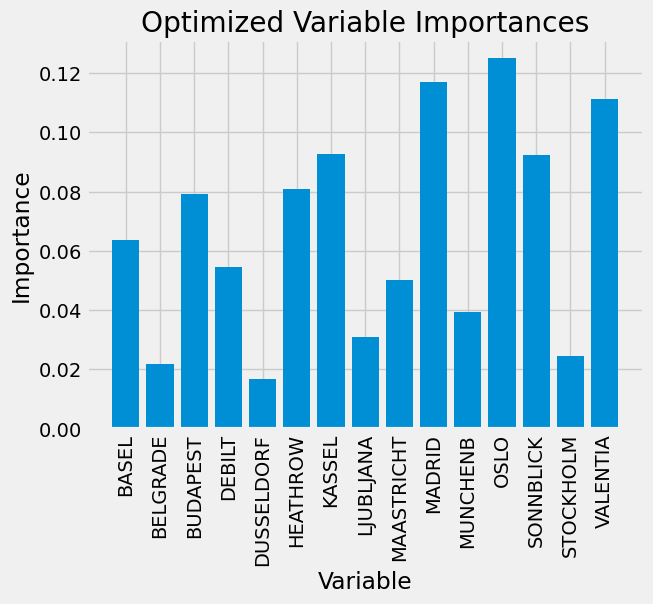

In [84]:
%matplotlib inline

fig3=plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(predictions)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, predictions, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Optimized Variable Importances');
plt.savefig('Optimized Station Influence Bar.png',dpi=400)

* After optimization Oslo becomes the top weather station instead of Madrid, so we will do the same for Oslo

## 6 Oslo

In [85]:
#make dataframe from df limiting data to one station
oslodf=df[df.columns[df.columns.astype(str).str.startswith('OSLO')]]
oslodf.head()

OSLO_cloud_cover  OSLO_humidity  OSLO_pressure  OSLO_global_radiation  \
0                 8           0.98         0.9978                   0.04   
1                 8           0.62         1.0139                   0.04   
2                 8           0.69         1.0234                   0.04   
3                 8           0.98         1.0244                   0.04   
4                 8           0.96         1.0092                   0.05   

   OSLO_precipitation  OSLO_sunshine  OSLO_temp_mean  OSLO_temp_min  \
0                1.14            0.0             4.9            3.8   
1                0.00            0.0             3.4            2.8   
2                0.08            0.0             1.9            0.6   
3                0.35            0.0             3.0            0.4   
4                0.26            0.0             3.7            2.9   

   OSLO_temp_max  
0            5.9  
1            4.9  
2            3.1  
3            4.9  
4            4.9

In [86]:
#make dataframe from pleasantdf limiting data to one stations
oslopleasant=pleasantdf[pleasantdf.columns[pleasantdf.columns.astype(str).str.startswith('OSLO')]]
oslopleasant.head()

OSLO_pleasant_weather
0                      0
1                      0
2                      0
3                      0
4                      0

In [87]:
#checking shape
print(oslodf.shape)
print(oslopleasant.shape)

(22950, 9)
(22950, 1)


In [88]:
#y
osloy=oslopleasant.max(axis=1)
print(osloy.shape)

(22950,)


In [89]:
#x
osloX=oslodf.to_numpy()
print(oslodf.shape)

(22950, 9)


In [90]:
# Split data into training and testing sets
X_train_O, X_test_O, y_train_O, y_test_O = train_test_split(osloX, osloy, random_state=2)

# Check shapes
print(X_train_O.shape, y_train_O.shape)
print(X_test_O.shape, y_test_O.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [91]:
# Creating a Random Forest classifier
clfO = RandomForestClassifier(n_estimators = 100)  

In [99]:
grid_spaceO={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,9],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [100]:
startO = time.time()
gridO = GridSearchCV(clfO,param_grid=grid_spaceO,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_gridO = gridO.fit(X_train_O, y_train_O)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


C:\Users\Samth\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Samth\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Samth\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Samth\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Samth\anaconda3\Lib\site-packa

Search took 38.843151315053305 minutes


In [106]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_gridO.best_params_))
print('Best GRID search score is: '+str(model_gridO.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best GRID search score is: 1.0


* with set parameters features final step of 9, grid score i 1

In [102]:
clf2O=RandomForestClassifier()

In [103]:
rs_spaceO={'max_depth':list(np.arange(10, 100, step=9)) + [None],
              'n_estimators':np.arange(10, 500, step=75),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [104]:
start2O = time.time()
rf_randomO = RandomizedSearchCV(clf2O, rs_spaceO, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_randomO = rf_randomO.fit(X_train_O, y_train_O)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 45.79050366083781 minutes


In [105]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_randomO.best_params_))
print('Best RANDOM search score is: '+str(model_randomO.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 160}
Best RANDOM search score is: 1.0


* grid score is 1

## 7 Oslo Random Forest

In [107]:
# creating a RF classifier with the best results from above
clf4 = RandomForestClassifier(n_estimators = 160, max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=4, criterion = 'entropy')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf4.fit(X_train_O, y_train_O)

RandomForestClassifier(criterion='entropy', max_features=5, min_samples_leaf=3,
                       min_samples_split=4, n_estimators=160)

In [108]:
# performing predictions on the test dataset
y_pred_O = clf4.predict(X_test_O)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_O, y_pred_O))

Model Accuracy:  1.0


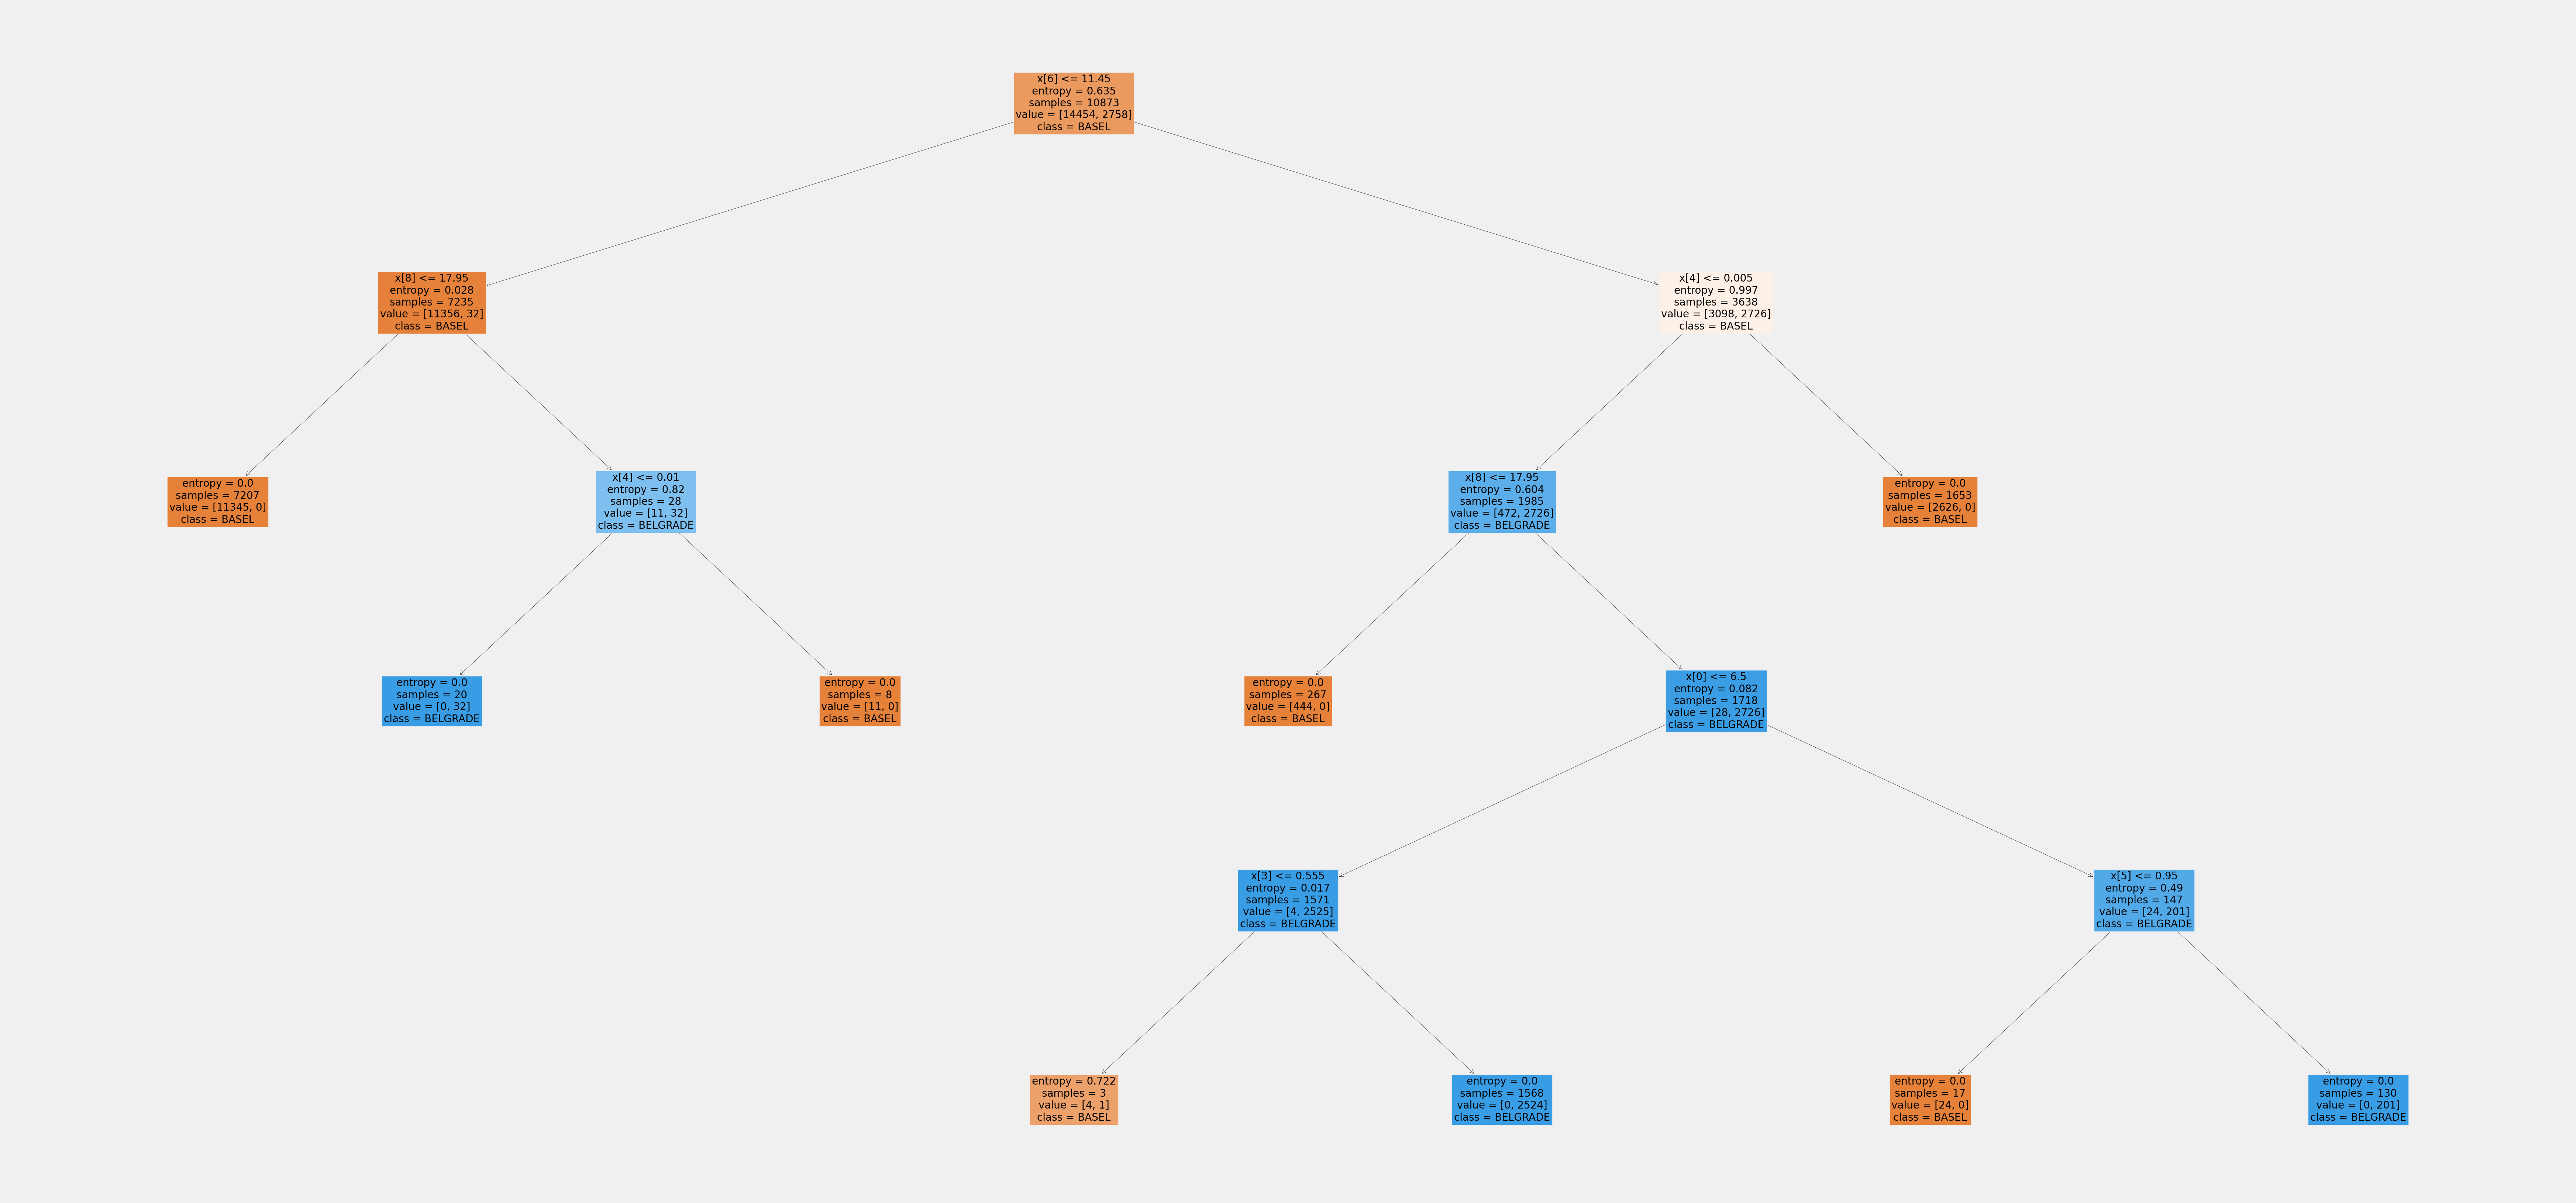

In [109]:
fig2 = plt.figure(figsize=(80,40))
plot_tree(clf4.estimators_[15], fontsize = 20, class_names=predictions, filled=True);

In [110]:
fig2.savefig(r"C:\Users\Samth\CareerFoundry Projects\DSML Achievement 2\3 VISUALIZATIONS/optimized_OSLO_decision_tree.png")

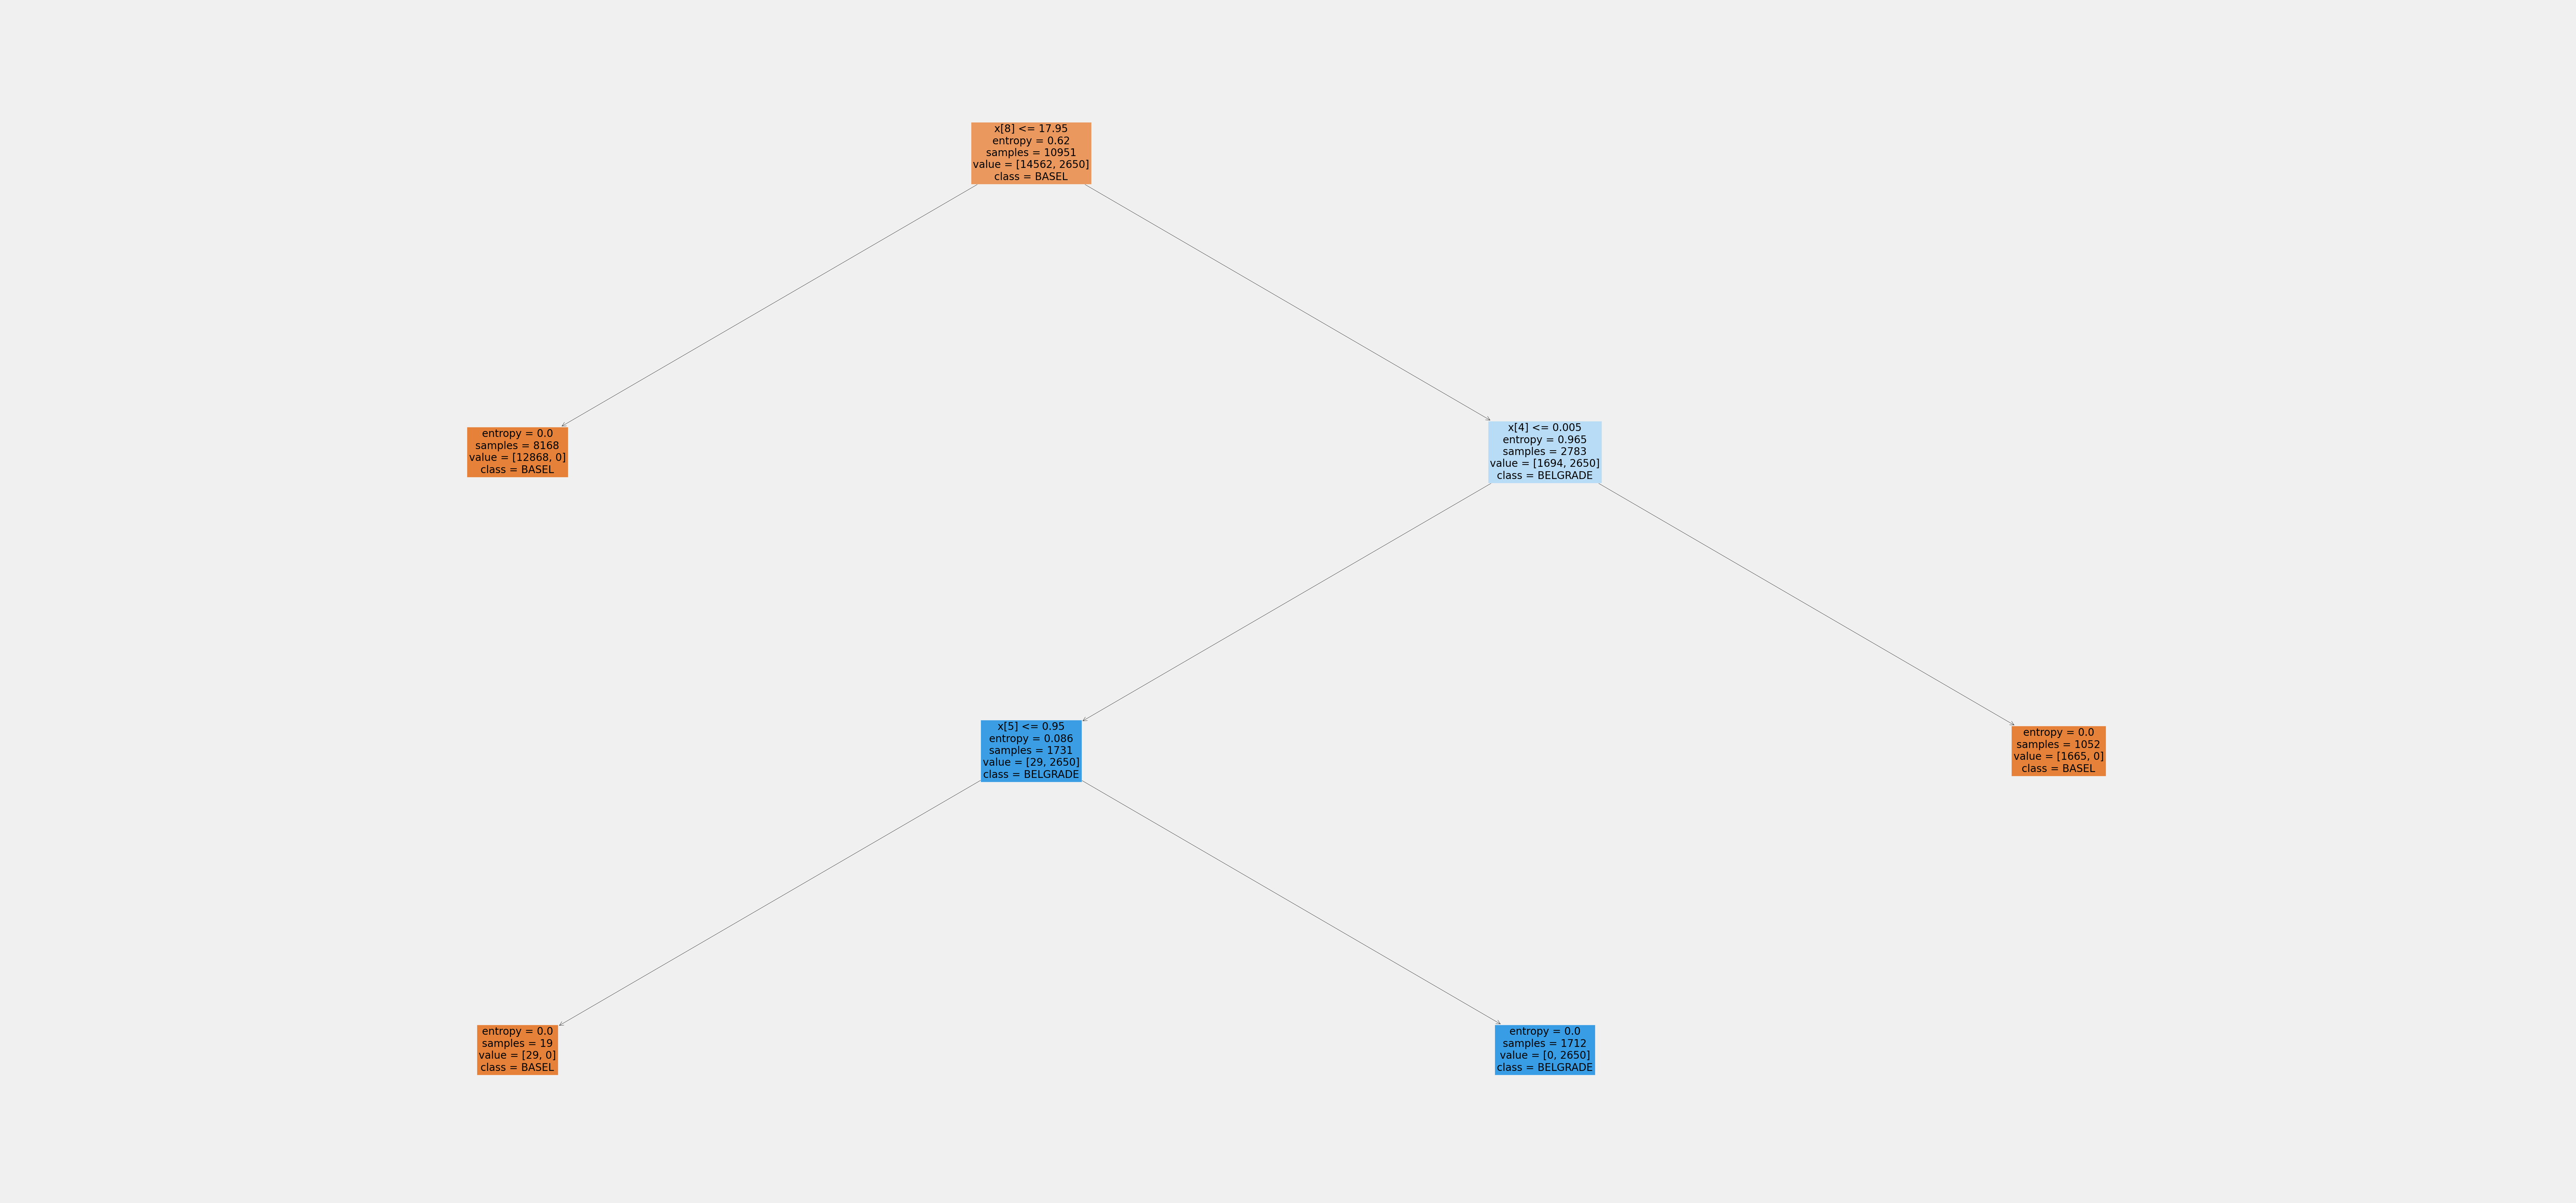

In [111]:
fig2 = plt.figure(figsize=(80,40))
plot_tree(clf4.estimators_[99], fontsize = 20, class_names=predictions, filled=True);

In [112]:
np.set_printoptions(threshold=np.inf)

newarrayO = clf4.feature_importances_

print(newarrayO)

[0.00930424 0.00234744 0.00267664 0.04926542 0.32778347 0.03075294
 0.12520301 0.01367535 0.43899149]


In [113]:
np.set_printoptions(threshold=1000)
newarrayO.shape

(9,)

In [116]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [117]:
# Retrieve feature importances from the trained model
feature_importancesO = clf4.feature_importances_
print("Feature Importances:", feature_importancesO)
print(feature_importancesO.shape)

Feature Importances: [0.00930424 0.00234744 0.00267664 0.04926542 0.32778347 0.03075294
 0.12520301 0.01367535 0.43899149]
(9,)


In [118]:
# Create a dataframe to associate observation measurements with their importances
importancesO = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importancesO
})

In [119]:
# Sort by importance for chart readability
importancesO = importancesO.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importancesO)

Feature Importance:
        Measurement  Importance
8          temp_max    0.438991
4     precipitation    0.327783
6         temp_mean    0.125203
3  global_radiation    0.049265
5          sunshine    0.030753
7          temp_min    0.013675
0       cloud_cover    0.009304
2          pressure    0.002677
1          humidity    0.002347


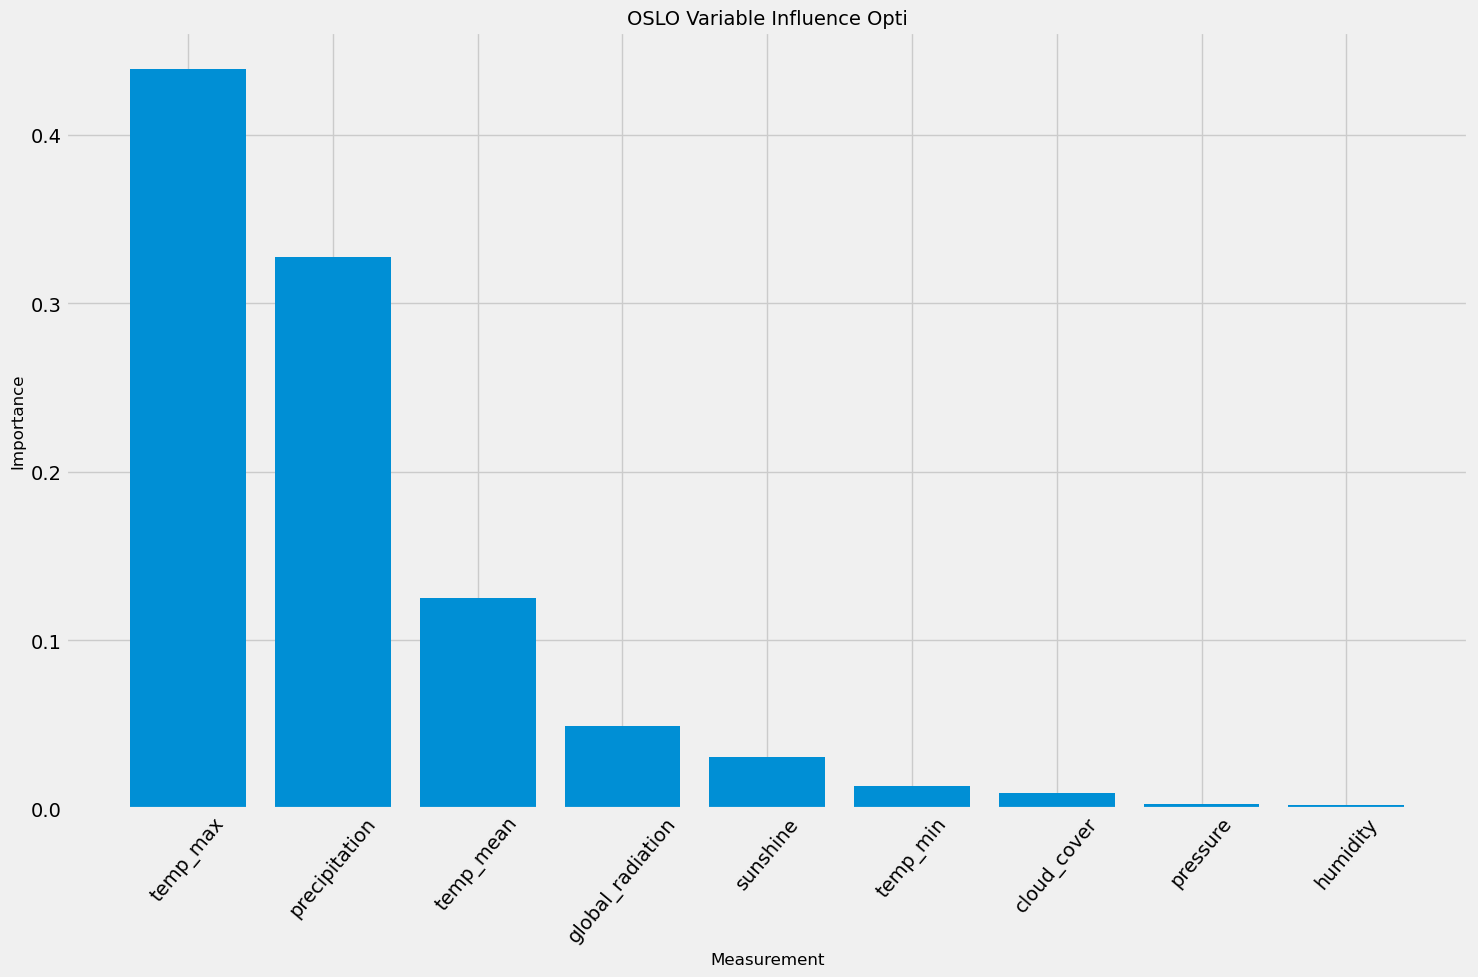

In [120]:
# Plot the importances

plt.style.use('fivethirtyeight')
plt5 = plt.figure(figsize=(15, 10))
plt.bar(importancesO['Measurement'], importancesO['Importance'])
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("OSLO Variable Influence Opti", fontsize=14)
plt.tight_layout()
plt.show()